In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
imgBGR = cv2.imread('opencv101_lena.png')

if imgBGR is None:
    print("WARNING: Image file is not available -or- could not be opened!")
else:
    print(imgBGR.shape)
    print(imgBGR.dtype)
    print(imgBGR.min())
    print(imgBGR.max())

(512, 512, 3)
uint8
1
255


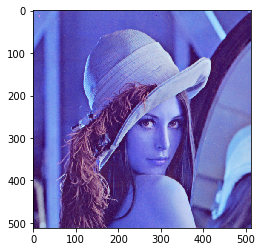

In [3]:
# OpenCV reads in BGR & matplotlib expects RGB, hence colors do not look appropriate
plt.imshow(imgBGR)
plt.show()

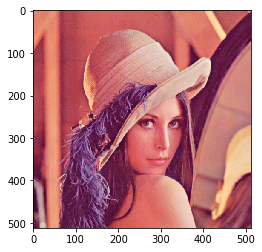

In [4]:
# Corrected BGR back to original RGB, so now colors should look fine
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

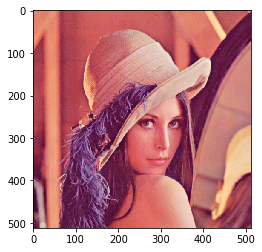

In [5]:
# BGR channels are being flipped using NUMPY INDEXING
plt.imshow(imgBGR[...,::-1]) #this conversion can be performed inline!
plt.show()

# Try '::-1' in rows field alone or in both rows & cols fileds

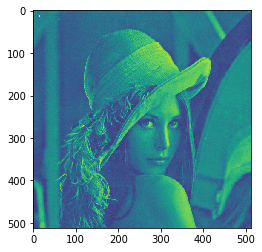

In [6]:
# Show only BLUE channel of imgBGR
plt.imshow(imgBGR[...,0])
plt.show()

(512, 512)


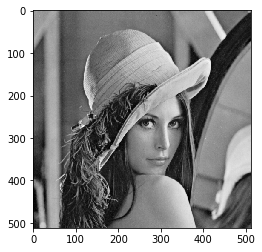

In [7]:
# Convert to GRAY
imgGRAY = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
print(imgGRAY.shape)

# When image shape is (M,N,3) or (M,N,4), it is interpreted as RGB or RGBA values & 'cmap' is ignored
# Must use 'cmap' for gray & even for other shapes image
plt.imshow(imgGRAY[...,:], cmap = 'gray') #cmap='gray' is required to show the image correctly
plt.show()

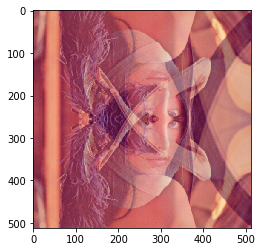

5
253
(512, 512, 3)


In [8]:
# BLEND images, i.e., just sum the pixel values
imgRGB_rotated=imgRGB[::-1,...]
imgBlended=np.int32(imgRGB_rotated/2 + imgRGB/2)
plt.imshow(imgBlended)
plt.show()
print(imgBlended.min())
print(imgBlended.max())
print(imgBlended.shape)

Refer to 'OpenCV >> Smoothing Images' documentation
Blur types:
* Simple Blur: kernel is all 1's which means averaging neighbour pixels
* Gaussian Blur: kernel has pixel weight varying as per Gaussian curve with some mean & std_dev
* Median Blur: Median of neighbouring pixels

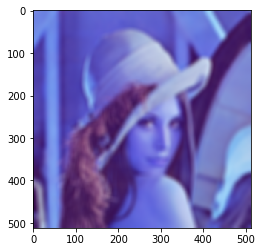

In [9]:
# Gaussian Blur
imgGaussianBlurred = cv2.GaussianBlur(imgRGB, (15,15), 7) #use a 15x15 Gaussial kernel with standard deviation 7
plt.imshow(imgGaussianBlurred[...,::-1])
plt.show()

Edge Detection: Sobel (first order derivative), Laplace (2nd order derivative but sensitive to noise)
Apply Edge Detection on gray images

(512, 512)
(512, 512)


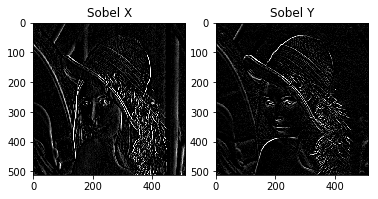

In [10]:
img_sobel_x=cv2.Sobel(imgGRAY,-1,1,0) #x-derivative set to 1, y-derivative set to 0
img_sobel_y=cv2.Sobel(imgGRAY,-1,0,1) #x-derivative set to 0, y-derivative set to 1
print(img_sobel_x.shape)
print(img_sobel_y.shape)

plt.subplot(1,2,1)
plt.imshow(img_sobel_x[...,::-1],cmap='gray')
plt.title('Sobel X')
plt.subplot(1,2,2)
plt.imshow(img_sobel_y[...,::-1],cmap='gray')
plt.title('Sobel Y')
plt.show()

In [11]:
imgBGR_messi = cv2.imread('opencv101_messi.jpg')
imgGRAY_messi = cv2.cvtColor(imgBGR_messi, cv2.COLOR_BGR2GRAY)
print(imgGRAY_messi.shape)

(200, 320)


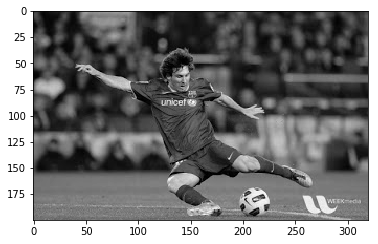

In [12]:
plt.imshow(imgGRAY_messi, cmap = 'gray')
plt.show()

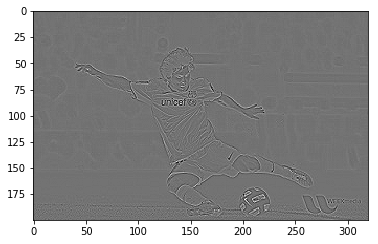

In [13]:
# TODO: Get a better sample image to demonstrate Laplacian Edge Detection
# ?? cv2.CV_64F ??
img_laplacian = cv2.Laplacian(imgGRAY_messi, cv2.CV_64F)
plt.imshow(img_laplacian,cmap='gray')
plt.show()

"Canny" edge detection is a multi-stage algorithm
1. Noise reduction using 5x5 Gaussian filter
2. Finding Intensity Gradient using Sobel_x & Sobel_y & then get EdgeGradient & its Direction
3. Non-maximum Suppression to retain only Edges
4. Hysteresis Thresholding

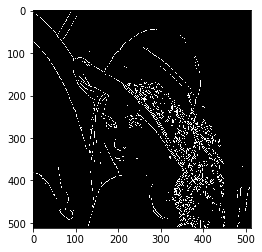

In [14]:
# 'Canny' filter based edge detection
img_canny = cv2.Canny(imgGRAY, 180, 200)
plt.imshow(img_canny[...,::-1],cmap='gray')
plt.show()